In [2]:
# Dependencies
import requests, pprint
import json, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file = "Resources/YOY_Change_copy.csv"
zip_df = pd.read_csv(file)
zip_df.head()


,Worksheet Filter,All Home For Sale,Inventory Year over Year,Period End,Property Type,Region,State Code,Date Convert,Month,Date,Year
0,Year-Over-Year Change,8972,-22.80%,1/31/12,All Residential,Orange County,CA,12-Jan,1,31,2012
1,Year-Over-Year Change,8464,-29.70%,2/28/12,All Residential,Orange County,CA,12-Feb,2,28,2012
2,Year-Over-Year Change,7858,-35.60%,3/31/12,All Residential,Orange County,CA,12-Mar,3,31,2012
3,Year-Over-Year Change,7360,-40.60%,4/30/12,All Residential,Orange County,CA,12-Apr,4,30,2012
4,Year-Over-Year Change,6992,-44.40%,5/31/12,All Residential,Orange County,CA,12-May,5,31,2012


In [4]:
clean_data_df = zip_df.drop(['Month', 'Date', 'Period End'], axis=1)

clean_data_df.head()

,Worksheet Filter,All Home For Sale,Inventory Year over Year,Property Type,Region,State Code,Date Convert,Year
0,Year-Over-Year Change,8972,-22.80%,All Residential,Orange County,CA,12-Jan,2012
1,Year-Over-Year Change,8464,-29.70%,All Residential,Orange County,CA,12-Feb,2012
2,Year-Over-Year Change,7858,-35.60%,All Residential,Orange County,CA,12-Mar,2012
3,Year-Over-Year Change,7360,-40.60%,All Residential,Orange County,CA,12-Apr,2012
4,Year-Over-Year Change,6992,-44.40%,All Residential,Orange County,CA,12-May,2012


AttributeError: Unknown property fontsize

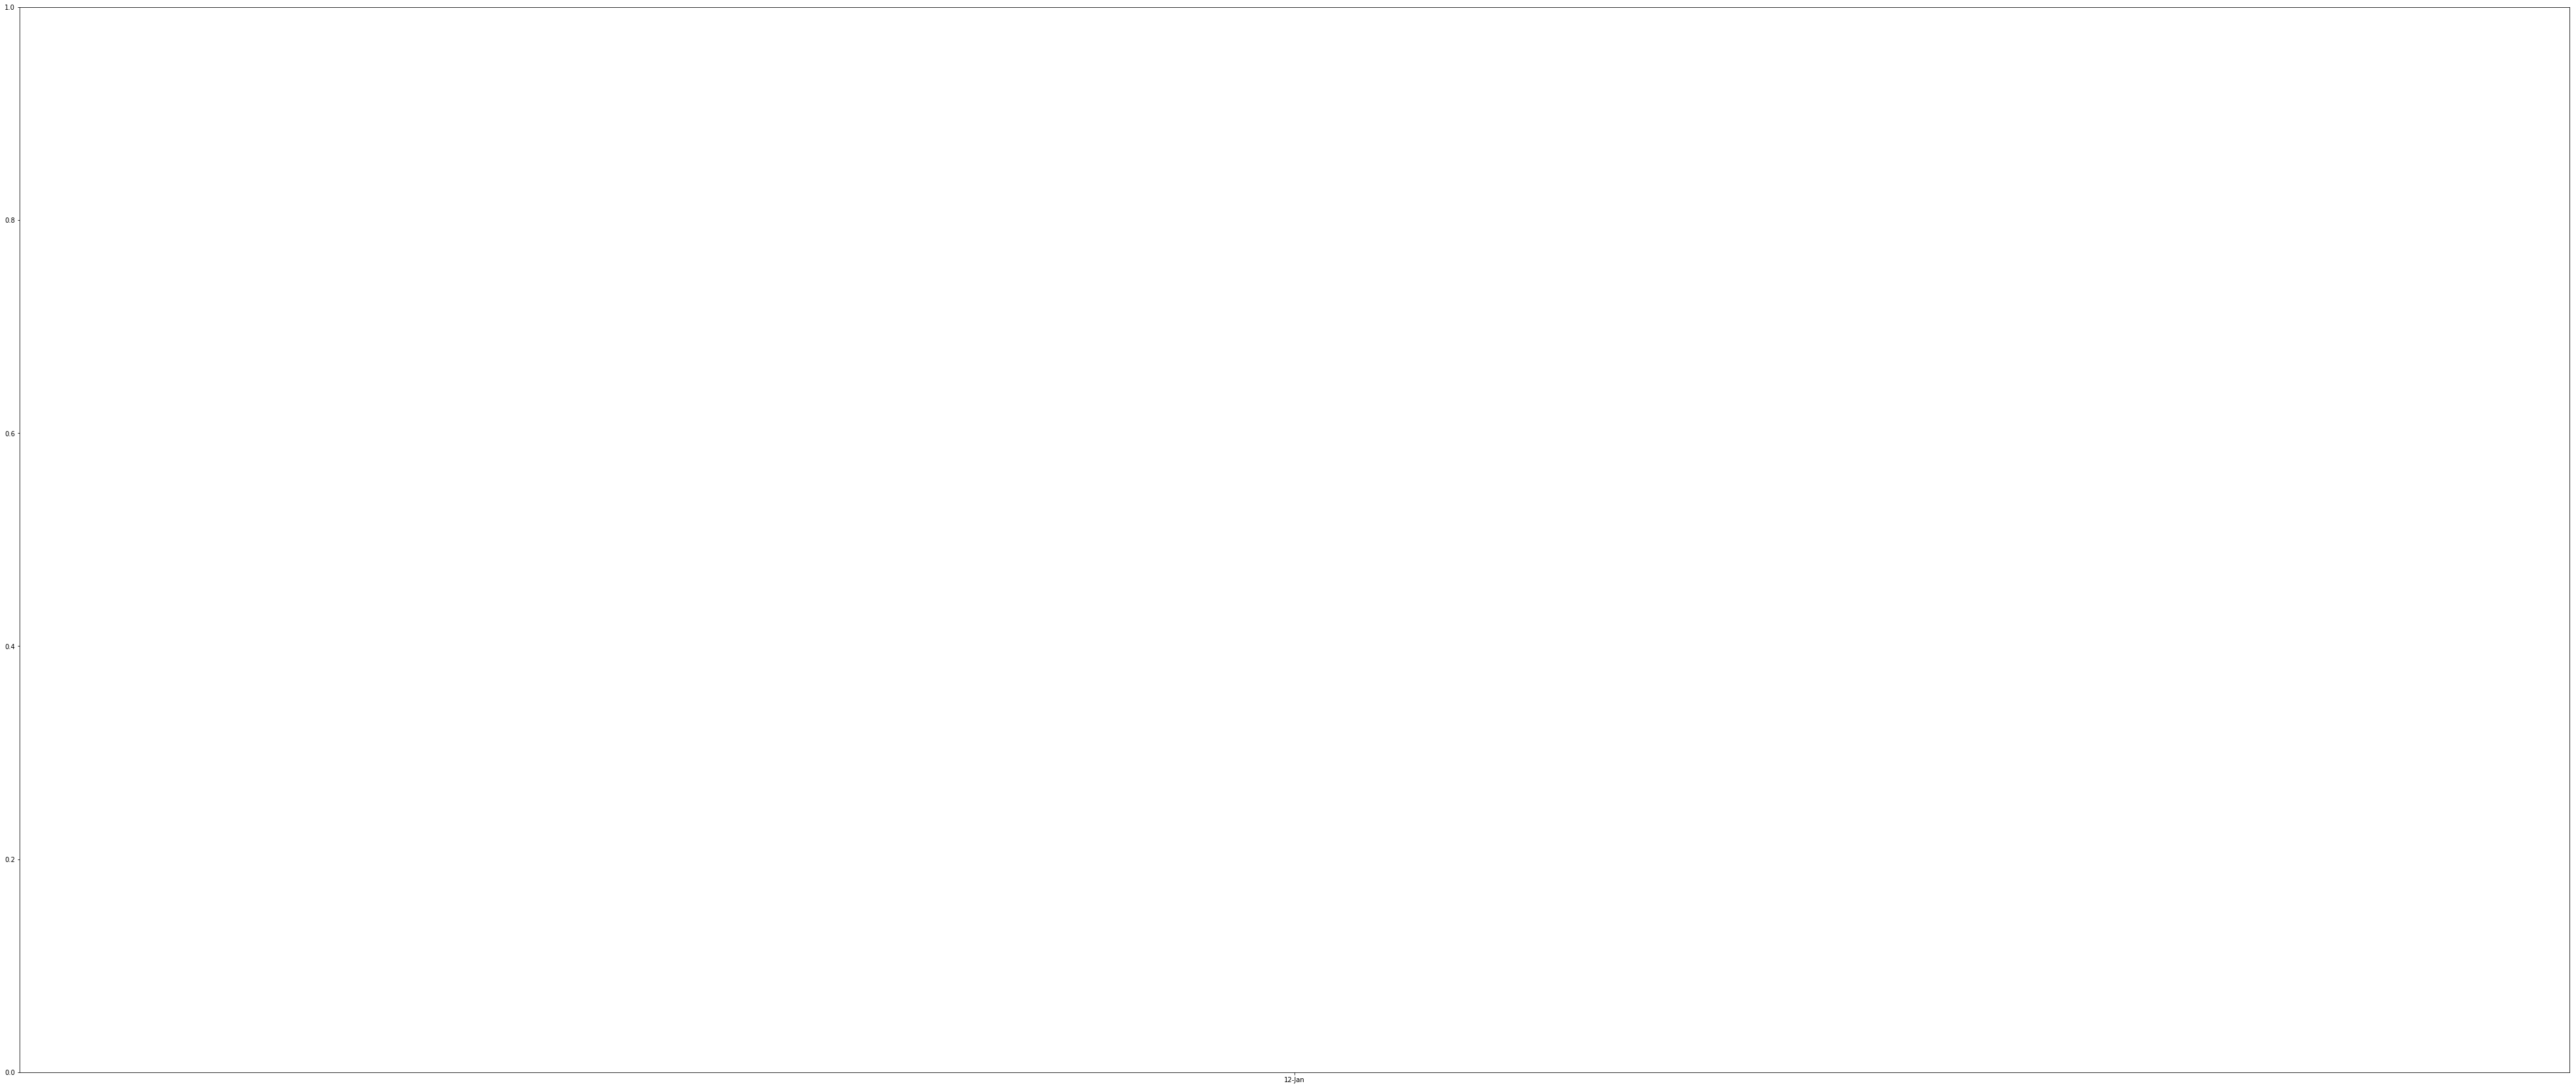

In [12]:
plt.figure(figsize=(70,30))

months = clean_data_df['Date Convert']
inventory = clean_data_df['All Home For Sale']

plt.bar(months, inventory, facecolor="lightskyblue", alpha=0.75, align="center", fontsize=10)

plt.title("House inventory from 2012-2018")
plt.xlabel("Months",fontsize=25)
plt.ylabel("All Home For Sale",fontsize=25)

plt.xlim(-0.75, len(months)-.25)
plt.ylim(0, max(inventory) + 1000)
plt.xlim(-0.75, len(months)-.25)
plt.ylim(0, max(inventory) + 1000)

plt.show()


plt.savefig("Images/Monthly_Inventory_Change.png")

In [7]:
group_data_df = clean_data_df.groupby('Year')
group_data_mean = group_data_df['All Home For Sale'].mean().round()
group_data_mean

Year
2012    6181.0
2013    4301.0
2014    6395.0
2015    7253.0
2016    7859.0
2017    7178.0
2018    7154.0
Name: All Home For Sale, dtype: float64

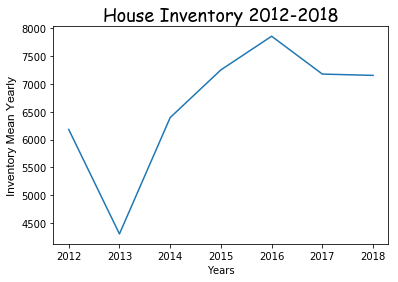

<Figure size 432x288 with 0 Axes>

In [8]:
ax = clean_data_df.groupby('Year')['All Home For Sale'].mean().plot(kind='line')
ax.set_xlabel("Years")

# Change the y axis label to Arial
ax.set_ylabel("Inventory Mean Yearly", fontname="Arial", fontsize=12)

# Set the title to Comic Sans
ax.set_title("House Inventory 2012-2018", fontname='Comic Sans MS', fontsize=18)

plt.show()
plt.savefig("Images/yearly_Inventory_Change.png")

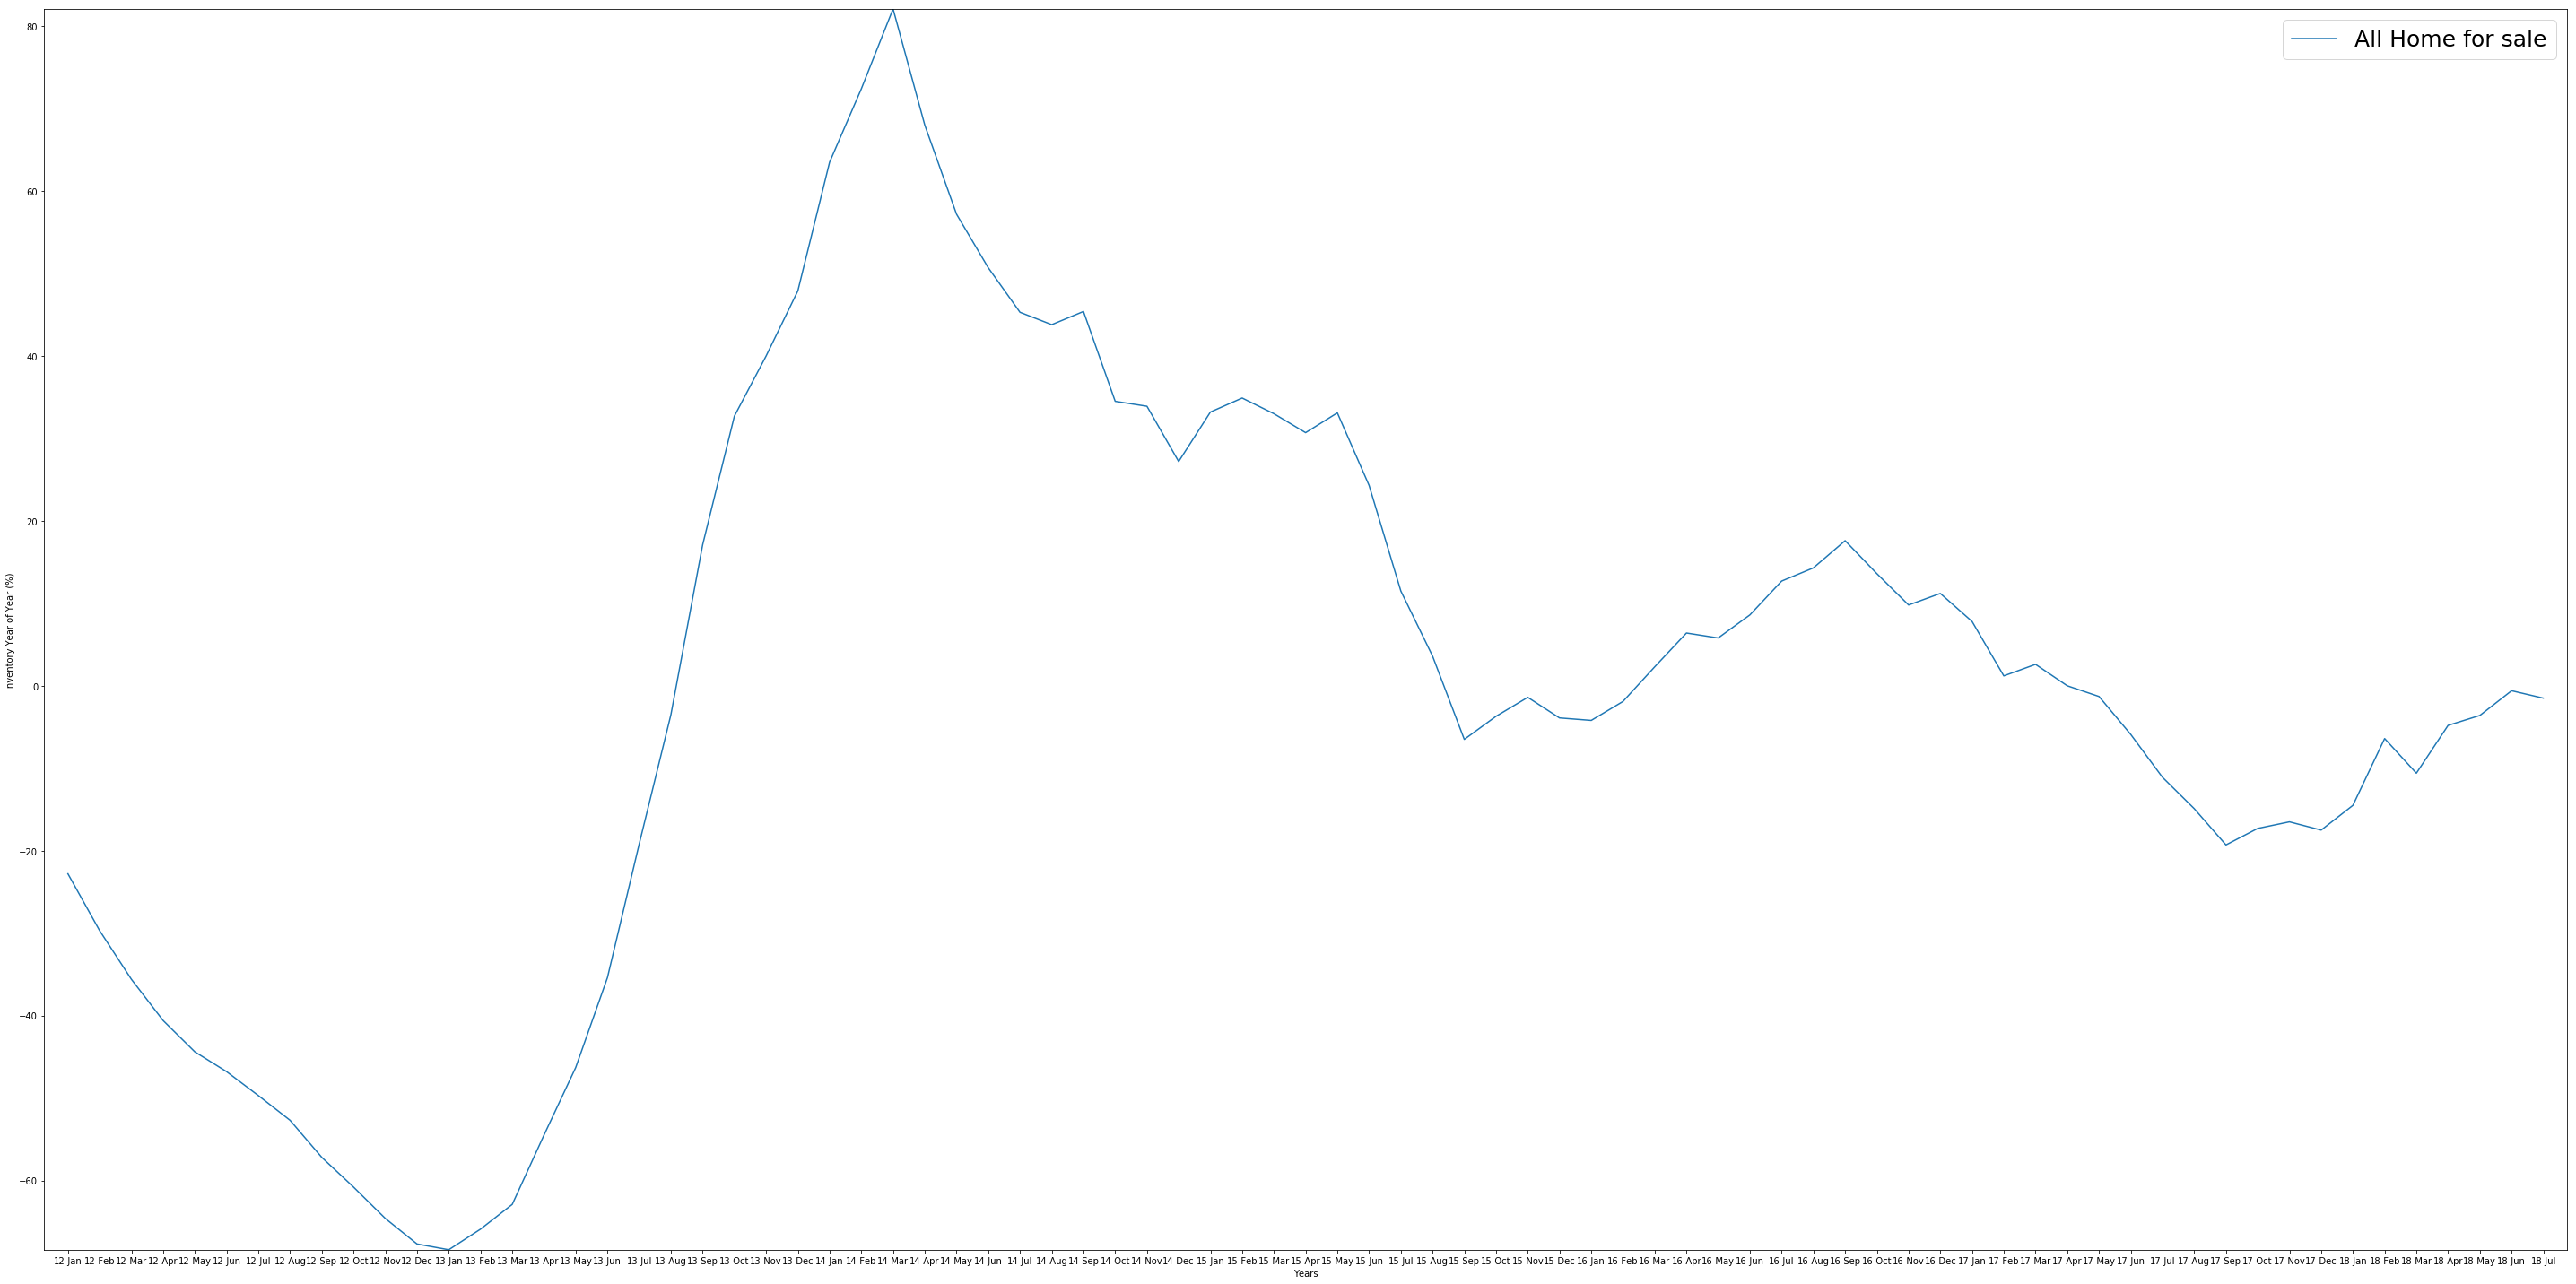

In [9]:
plt.figure(figsize=(40,20))

inventory_yoy=clean_data_df['Inventory Year over Year']

inventory_final=[]

for i in inventory_yoy:
    inventory_0 = i.split('%')
    result = float(inventory_0[0])
    inventory_final.append(result)
    
plt.plot(months, inventory_final, label = 'All Home for sale')

plt.xlim(-0.75, len(months)-.25)
plt.ylim(min(inventory_final), max(inventory_final))

plt.xlabel('Years')
plt.ylabel('Inventory Year of Year (%) ')
plt.tight_layout()
plt.legend(loc="best", fontsize =25)

plt.savefig("Images/Inventory_yoy.png")